# Table of Contents


# Libraries

In [1]:
import pandas as pd
import cPickle as pickle
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append('./hoopla')

from hoopla import hoopla as hp

# Data Acquisition

In [10]:
reload(hp) # As needed

<module 'hoopla.hoopla' from 'hoopla/hoopla.py'>

In [14]:
# choose teams

teamname = "Clippers" # capitalize
opponentname = "Mavericks" # 

# Get Team IDs
team_id = hp.get_team_id(teamname)
opponent_id = hp.get_team_id(opponentname)

# Get Dates
gdates = hp.get_reg_season_gamedates_2013_2014_2015(teamname,opponentname)


# Update Teams in Arguments
period_args = hp.init_args
period_args.update({"TeamID":team_id,"OpponentTeamID":opponent_id})

Past games to analyze: 8
Future games this season: 3


In [15]:
# Build frame
df = hp.grab_quarter_stats(hp.init_payload(),period_args,gdates)

Base
http://stats.nba.com/stats/leaguedashteamstats?PlusMinus=N&GameScope=&TeamID=1610612746&Location=&StarterBench=&ShotClockRange=&SeasonType=Regular+Season&Division=&Season=2014-15&PaceAdjust=N&DateFrom=1-3-2014&PlayerPosition=&VsConference=&OpponentTeamID=1610612742&DateTo=1-3-2014&GameSegment=&LastNGames=0&PlayerExperience=&VsDivision=&LeagueID=00&Outcome=&MeasureType=Base&PORound=0&PerMode=Totals&SeasonSegment=&Period=1&Rank=N&Month=0
<Response [200]>
[]
[u'W', u'MIN', u'TOV', 'Period', 'TeamID', u'REB', u'TEAM_NAME', u'W_PCT', u'FG3A', u'AST', u'PLUS_MINUS', 'DateFrom', u'FG3M', u'OREB', u'FGM', u'PF', u'PTS', u'FGA', 'OpponentTeamID', u'CFPARAMS', u'STL', 'DateTo', u'L', u'FTA', u'BLK', u'GP', u'DREB', u'FTM', u'FT_PCT', 'MeasureType', u'PFD', u'FG_PCT', u'CFID', u'TEAM_ID', u'FG3_PCT', u'BLKA']
initializing periodframe
Advanced
http://stats.nba.com/stats/leaguedashteamstats?PlusMinus=N&GameScope=&TeamID=1610612746&Location=&StarterBench=&ShotClockRange=&SeasonType=Regular+Seas

In [16]:
df.to_pickle("data/fullstats_lac_dal_20132016_110215_v1.p")

# Column Pruning

In [32]:
# Clippers Dallas
df = pd.read_pickle("data/fullstats_lac_dal_20132016_110215_v1.p")

# Clippers GSW
# df = pd.read_pickle("data/fullstats_lac_gsw_20142015_103115_v3.p")

# Isolate candidates for target variables

"""
See Spreadsheet for column itemization:
    https://docs.google.com/spreadsheets/d/1ZY1l1wzs9op_akQaXdYeyfWWPxfgSgMGsnt6d_6OOxA/edit#gid=0
"""

not_needed_columns=['DateTo',
                    'TeamID',
                   'W',
                   'L',
                   'GP']

context_columns=['DateFrom',
                'MeasureType',
                'OpponentTeamID',
                'Period',
                'TEAM_ID',
                'TEAM_NAME'
                 ]

target_columns=["PLUS_MINUS"] #comments work?]
                
               
               
               
factor_columns=[
    'AST_PCT',
    'BLK',
    'DEF_RATING',
    'DREB',
    'DREB_PCT',
    'EFG_PCT',
    'FG3A',
    'FG3M',
    'FG3_PCT',
    'FGA',
    'FGM',
    'FG_PCT',
    'FTA',
    'OFF_RATING',
    'OPP_AST',
    'OPP_EFG_PCT',
    'OPP_FGA',
    'OPP_FGM',
    'OPP_PTS_2ND_CHANCE',
    'OPP_PTS_PAINT',
    'OPP_REB',
    'OPP_STL',
    'OREB',
    'OREB_PCT',
    'PACE',
    'PCT_PTS_2PT',
    'PCT_PTS_3PT',
    'PCT_PTS_FB',
    'PCT_PTS_FT',
    'PCT_PTS_OFF_TOV',
    'PCT_PTS_PAINT',
    'PF',
    'PIE',
    'PTS',
    'PTS_2ND_CHANCE',
    'PTS_FB',
    'PTS_OFF_TOV',
    'PTS_PAINT',
    'REB',
    'REB_PCT',
    'STL',
    'TM_TOV_PCT',
    'TOV',
    'TS_PCT',
        'NET_RATING'
    ]


"""
Additional column definitions
PF personal foul

"""
#new_columns = target_columns + factor_columns + context_columns
df = df.drop(not_needed_columns,axis=1)

In [27]:
# Remove context columns
varcols = df.columns.tolist()
for i in (context_columns):
    varcols.remove(i)
df = df[varcols]

# Regression for each variable

* Find p value for each variable against plus-minus

**Notes**

* R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model

In [31]:
df

,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,OPP_FT_PCT,OPP_STL,OPP_FG3A,OPP_PTS,OPP_AST,OPP_FGA,OPP_OREB,OPP_DREB,OPP_FTM,OPP_FG3M
0,1,12,11,24,0.458,3,7,0.429,5,5,...,1.000,0,5,24,7,21,3,9,2,2
0,1,12,12,24,0.500,2,8,0.250,0,0,...,0.800,2,11,24,7,24,2,9,4,2
0,1,12,11,20,0.550,3,7,0.429,7,11,...,0.500,1,6,24,7,22,2,8,2,2
0,1,12,12,20,0.600,5,9,0.556,3,5,...,0.667,1,8,28,8,19,1,6,4,6
0,1,12,11,24,0.458,2,6,0.333,8,8,...,0.778,0,10,31,6,19,1,7,7,4
0,1,12,14,22,0.636,3,8,0.375,3,6,...,1.000,0,8,22,8,22,5,7,2,2
0,1,12,11,26,0.423,4,8,0.500,2,2,...,0.636,1,8,27,2,23,7,8,7,2
0,1,12,5,20,0.250,0,5,0.000,11,13,...,0.750,1,8,18,3,17,1,11,6,2
0,0,12,9,17,0.529,2,8,0.250,4,9,...,0.000,2,7,21,7,22,4,8,0,3
0,0,12,13,23,0.565,1,5,0.200,0,1,...,0.500,4,7,38,9,24,4,7,2,4


In [28]:
# Initialize list to capture data
pval_errors = []
pvals = []
pvals.append(["var_name","p_value","t_stat","coef","r2"])

# Run capture loop
for var in df.columns:
    try:
        model = pd.ols(y=df.PLUS_MINUS, x=df[var])
        var_data = [var,model.p_value['x'],model.t_stat['x'],model.beta['x'],model.r2]
        pvals.append(var_data)
    except:
        pval_errors.append(var)
    
# Convert to dataframe
pvals=pd.DataFrame(pvals[1:],columns=pvals[0])

pvals.set_index("var_name",inplace=True)

# print errors
print "Error vars: %s" % pval_errors

# Remove plus_minus
pvals = pvals.drop('PLUS_MINUS',axis=0)

Error vars: [u'CFPARAMS']


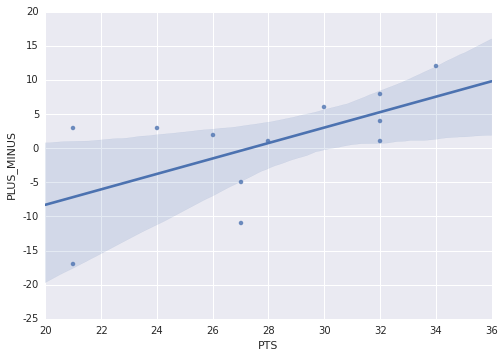

In [29]:
sns.regplot(y="PLUS_MINUS",x="PTS",data=df)

In [22]:
model = pd.ols(y=df.PLUS_MINUS, x=df.PTS)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         144
Number of Degrees of Freedom:   2

R-squared:        -0.0000
Adj R-squared:    -0.0070

Rmse:              7.7727

F-stat (1, 142):    -0.0000, p-value:     1.0000

Degrees of Freedom: model 1, resid 142

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0000     0.1557       0.00     1.0000    -0.3052     0.3052
     intercept     0.5833     4.3819       0.13     0.8943    -8.0052     9.1719
---------------------------------End of Summary---------------------------------

In [25]:
pvals.sort('p_value')

,p_value,t_stat,coef,r2
var_name,,,,
MIN,0.367649,9.037488e-01,4.827586e-02,0.000000e+00
CFID,0.367649,9.037488e-01,5.775578e-02,0.000000e+00
OPP_FG3A,1.000000,-1.262125e-14,-4.676814e-15,0.000000e+00
PCT_FGA_2PT,1.000000,1.006876e-14,7.371881e-14,-2.220446e-16
FGA,1.000000,-9.834317e-15,-2.643719e-15,2.220446e-16
PTS,1.000000,8.645534e-15,1.346145e-15,-2.220446e-16
PIE,1.000000,8.450289e-15,3.907985e-14,-6.661338e-16
DREB,1.000000,-8.177311e-15,-2.178813e-15,-2.220446e-16
FG3A,1.000000,7.970219e-15,3.441691e-15,0.000000e+00


In [481]:
pvals.sort("p_value",inplace=True)

In [489]:
pvals.sort("r2",ascending=False)

,p_value,t_stat,coef,r2
var_name,,,,
REB_PCT,1.000000,-7.455040e-15,-6.084022e-14,4.440892e-16
OFF_RATING,1.000000,-6.233432e-15,-2.671474e-16,4.440892e-16
OPP_REB,1.000000,4.835956e-15,1.571659e-15,4.440892e-16
FT_PCT,1.000000,-1.448234e-15,-2.546574e-15,2.220446e-16
PF,1.000000,4.920272e-15,2.053045e-15,2.220446e-16
FG3M,1.000000,-3.290112e-15,-1.457168e-15,2.220446e-16
OPP_DREB,1.000000,2.351097e-15,1.179612e-15,2.220446e-16
OREB_PCT,1.000000,-2.325699e-15,-1.354472e-14,2.220446e-16
AST_TO,1.000000,-2.113926e-15,-8.812395e-16,2.220446e-16


In [ ]:
# Identify pvals under .1
pvals_all = pvals
pvals = pvals[pvals.p_value < .1]

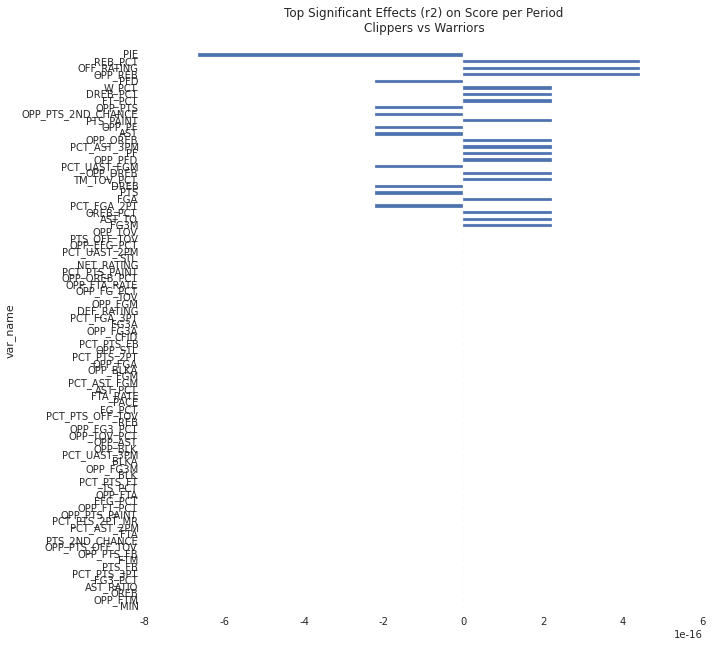

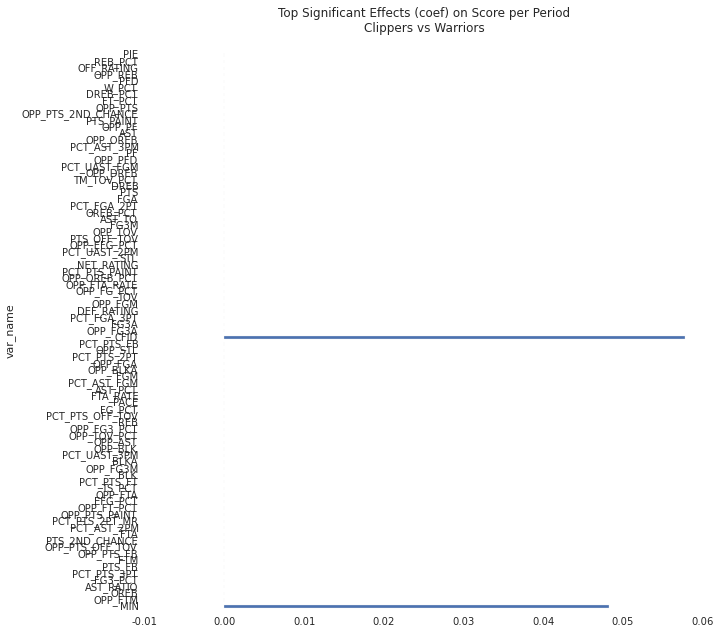

In [490]:
# Sort pvals by r2 absolute value
pvals['abs_r2']=abs(pvals.r2)
pvals.sort('abs_r2',inplace=True)

# Plot top coefficients
plt.figure(figsize=(10,10))
pvals.r2.plot(kind='barh')
plt.title('Top Significant Effects (r2) on Score per Period\nClippers vs Warriors\n')
plt.show()

# Plot top coefficients
plt.figure(figsize=(10,10))
pvals.coef.plot(kind='barh')
plt.title('Top Significant Effects (coef) on Score per Period\nClippers vs Warriors\n')
plt.show()

We want to preserve only effects with meaningful interpretations

In [244]:
sig_vars = pvals.index.tolist()

In [257]:
sig_vars_descriptions=[
    'Opponents Offensive Rebounds',
    'Opponents 3 Pointers Made',
    'Opponent Points FB ???',
    'Opponent Blocks',
    '???',
    'Percent scores from 3 Points',
    'Field Goal Percentage',
    'Field Goals Made',
    'Opponent Points from Turnovers',
    'Rebounds',
    'Opponents Assists',
    'Effective Field Goal Percentage',
    'Total Shot ??? Percentage',
    '3 Pointers Made',
    'Opponent Field Goals Made',
    'Points',
    'Offensive Rating',
    'Defensive Rebounds',
    'Defensive Rating',
    'Opponents Effective Field Goal Percentage',
    'Opponents Points',
    'Opponents Field Goal Percentage',
    'Total Player Impact Estimate',
    'Net Rating'
    ]

In [454]:
pvals['Description']=sig_vars_descriptions

ValueError: Length of values does not match length of index

In [491]:
pvals

,p_value,t_stat,coef,r2,abs_r2
var_name,,,,,
MIN,0.367649,9.037488e-01,4.827586e-02,0.000000e+00,0.000000e+00
OPP_FTM,1.000000,9.676951e-16,2.844947e-16,0.000000e+00,0.000000e+00
OREB,1.000000,-1.186457e-15,-4.787837e-16,0.000000e+00,0.000000e+00
AST_RATIO,1.000000,-1.105347e-15,-1.370432e-16,0.000000e+00,0.000000e+00
FG3_PCT,1.000000,-1.101516e-15,-4.607426e-15,0.000000e+00,0.000000e+00
PCT_PTS_3PT,1.000000,-1.138805e-15,-4.440892e-15,0.000000e+00,0.000000e+00
PTS_FB,1.000000,-1.191120e-15,-2.584738e-16,0.000000e+00,0.000000e+00
FTM,1.000000,1.066498e-15,2.046974e-16,0.000000e+00,0.000000e+00
OPP_PTS_FB,1.000000,-9.804583e-16,-1.908196e-16,0.000000e+00,0.000000e+00


In [453]:
sig_vars_descriptions

['Opponents Offensive Rebounds',
 'Opponents 3 Pointers Made',
 'Opponent Points FB ???',
 'Opponent Blocks',
 '???',
 'Percent scores from 3 Points',
 'Field Goal Percentage',
 'Field Goals Made',
 'Opponent Points from Turnovers',
 'Rebounds',
 'Opponents Assists',
 'Effective Field Goal Percentage',
 'Total Shot ??? Percentage',
 '3 Pointers Made',
 'Opponent Field Goals Made',
 'Points',
 'Offensive Rating',
 'Defensive Rebounds',
 'Defensive Rating',
 'Opponents Effective Field Goal Percentage',
 'Opponents Points',
 'Opponents Field Goal Percentage',
 'Total Player Impact Estimate',
 'Net Rating']

## Regression Plot Collection

In [266]:
for v in pvals[-10:].index:
    print pvals.ix[v].Description

Opponent Field Goals Made
Points
Offensive Rating
Defensive Rebounds
Defensive Rating
Opponents Effective Field Goal Percentage
Opponents Points
Opponents Field Goal Percentage
Total Player Impact Estimate
Net Rating


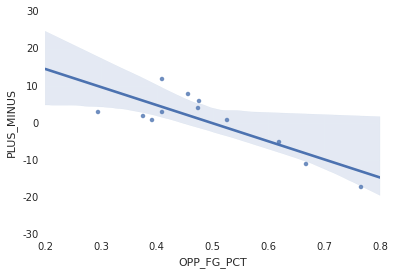

In [516]:

sns.regplot(y='PLUS_MINUS',x='OPP_FG_PCT',data=df)

In [510]:
pvals.tail(10)

,p_value,t_stat,coef,r2,abs_r2
var_name,,,,,
PCT_PTS_2PT_MR,1.000000,1.408347e-15,7.771561e-15,0.000000e+00,0.000000e+00
EFG_PCT,1.000000,1.589330e-15,8.770762e-15,0.000000e+00,0.000000e+00
OPP_FTA_RATE,1.000000,3.296294e-15,1.398881e-14,0.000000e+00,0.000000e+00
OPP_FG_PCT,1.000000,3.372678e-15,1.687539e-14,0.000000e+00,0.000000e+00
PCT_UAST_FGM,1.000000,5.136722e-15,2.202405e-14,-2.220446e-16,2.220446e-16
PIE,1.000000,8.450289e-15,3.907985e-14,-6.661338e-16,6.661338e-16
PCT_FGA_3PT,1.000000,5.701589e-15,4.174439e-14,0.000000e+00,0.000000e+00
PCT_FGA_2PT,1.000000,1.006876e-14,7.371881e-14,-2.220446e-16,2.220446e-16
MIN,0.367649,9.037488e-01,4.827586e-02,0.000000e+00,0.000000e+00


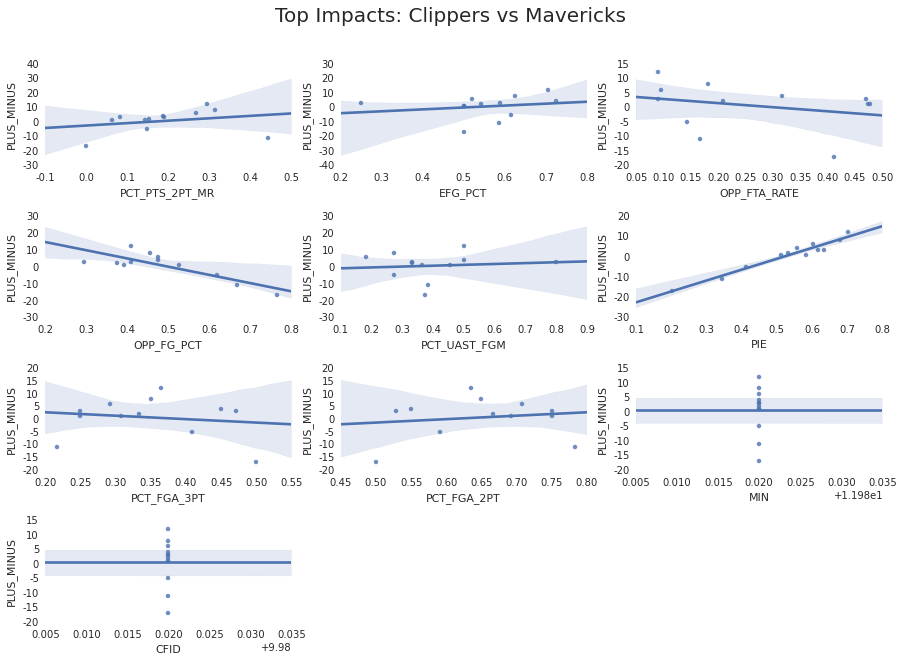

In [506]:
pvals.sort("coef",inplace=True)

i = 1
plt.figure(figsize=(15,10))
plt.suptitle('Top Impacts: Clippers vs Mavericks',fontsize=20)
for v in pvals[-10:].index:
    plt.subplot(4,3,i)
    sns.regplot(x=v,y="PLUS_MINUS",data=df)
   
    i += 1


### Aside -- PCA with Mavericks data

### End Aside

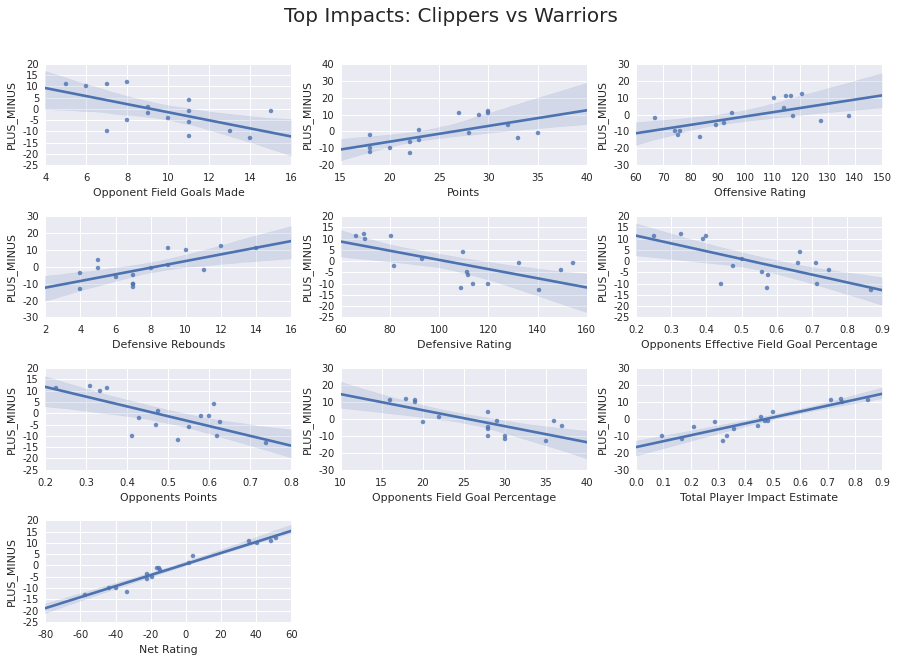

In [272]:
i = 1
plt.figure(figsize=(15,10))
plt.suptitle('Top Impacts: Clippers vs Warriors',fontsize=20)
for v in pvals[-10:].index:
    plt.subplot(4,3,i)
    sns.regplot(x=v,y="PLUS_MINUS",data=df,label=pvals.ix[v].Description)
    plt.xlabel(pvals.ix[v].Description)
    i += 1


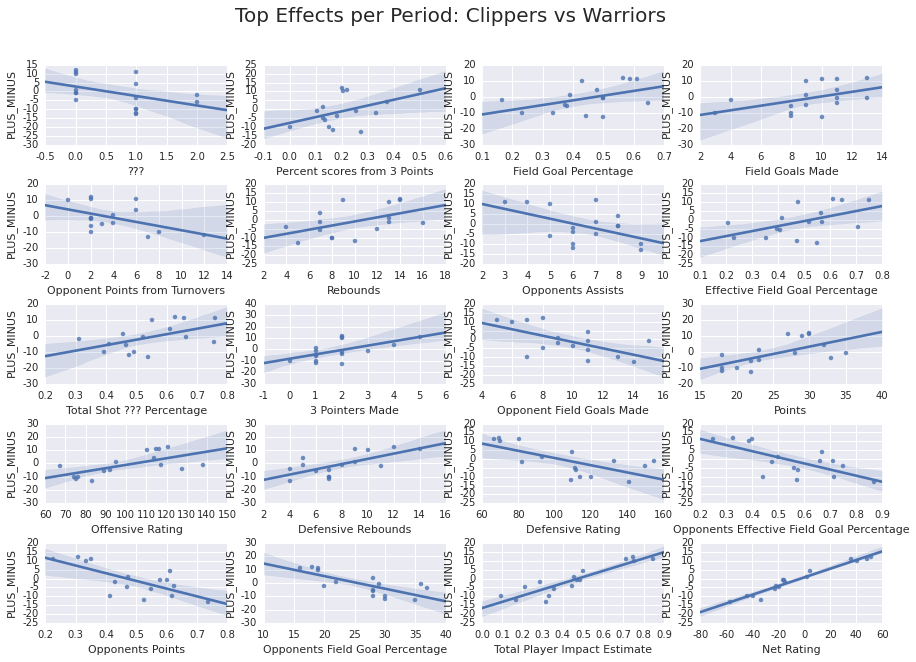

In [275]:
i = 1
plt.figure(figsize=(15,10))
plt.suptitle('Top Effects per Period: Clippers vs Warriors',fontsize=20)
for v in pvals[-20:].index:
    plt.subplot(5,4,i)
    sns.regplot(x=v,y="PLUS_MINUS",data=df,label=v,xlabel="")
    plt.xlabel(pvals.ix[v].Description)
    i += 1


# Exploratory Plotting

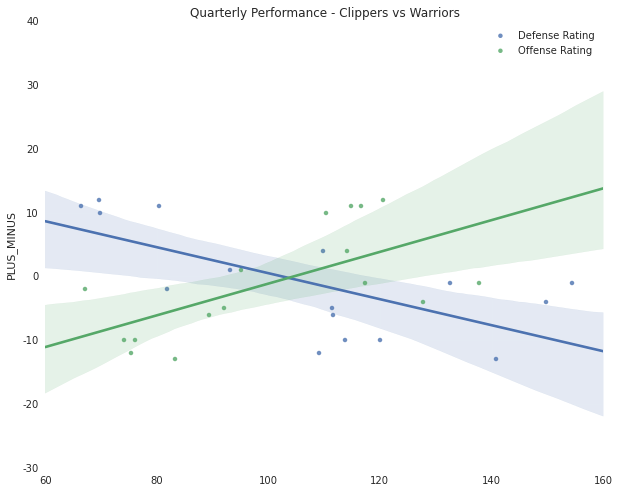

In [64]:
plt.figure(figsize(10,8))

sns.regplot(x="DEF_RATING",y="PLUS_MINUS",data=df,label="Defense Rating",xlabel="")
sns.regplot(x="OFF_RATING",y="PLUS_MINUS",data=df,label="Offense Rating",xlabel="")

#sns.regplot(x="REB",y="PLUS_MINUS",data=df,label="Rebounds",xlabel="")
#sns.regplot(x="STL",y="PLUS_MINUS",data=df,label="Steals",xlabel="")
#sns.regplot(x="PF",y="PLUS_MINUS",data=df,label="Personal Fouls",xlabel="")


plt.title("Quarterly Performance - Clippers vs Warriors")
plt.legend()
plt.xlabel("")


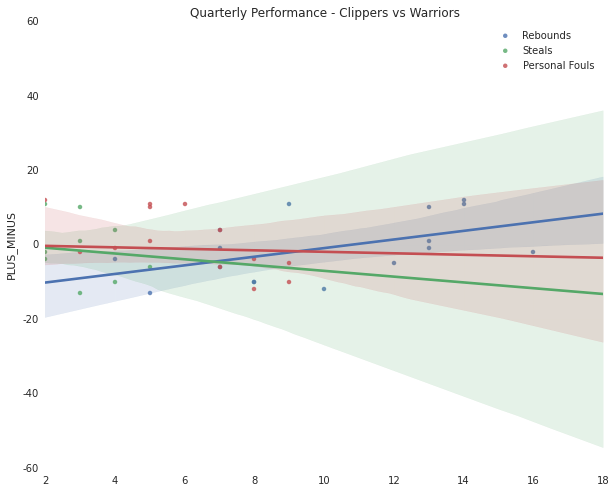

In [51]:
plt.figure(figsize(10,8))

#sns.regplot(x="DEF_RATING",y="PLUS_MINUS",data=df,label="Offense",xlabel="")
#sns.regplot(x="OFF_RATING",y="PLUS_MINUS",data=df,label="Defense",xlabel="")

sns.regplot(x="REB",y="PLUS_MINUS",data=df,label="Rebounds",xlabel="")
sns.regplot(x="STL",y="PLUS_MINUS",data=df,label="Steals",xlabel="")
sns.regplot(x="PF",y="PLUS_MINUS",data=df,label="Personal Fouls",xlabel="")


plt.title("Quarterly Performance - Clippers vs Warriors")
plt.legend()
plt.xlabel("")


In [ ]:
ax=df.plot(kind='scatter',y='PLUS_MINUS',x="OFF_RATING",color='DarkBlue',label="Offense")

df.plot(kind='scatter', x='DEF_RATING', y='PLUS_MINUS',color='DarkRed', label='Defense', ax=ax,figsize=(10,5));
plt.title('Plus_Minus by Quarter - LAC vs GSW')

## Pandas Stats

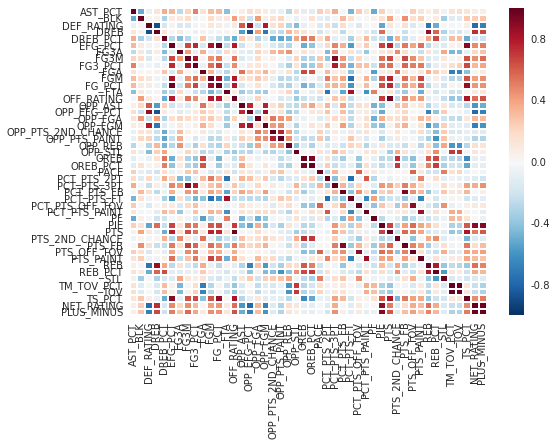

In [63]:
cols=factor_columns + target_columns
corrmat = df[cols].corr()
sns.heatmap(corrmat)

In [64]:
corrmat

,AST_PCT,BLK,DEF_RATING,DREB,DREB_PCT,EFG_PCT,FG3A,FG3M,FG3_PCT,FGA,...,PTS_OFF_TOV,PTS_PAINT,REB,REB_PCT,STL,TM_TOV_PCT,TOV,TS_PCT,NET_RATING,PLUS_MINUS
AST_PCT,1.000000,-0.502431,-0.078051,0.134620,0.369854,0.330835,-0.269889,0.221729,0.503601,0.149046,...,0.246927,0.138044,0.056254,0.152690,-0.047214,0.144866,0.180405,0.132568,0.068320,0.074440
BLK,-0.502431,1.000000,0.030209,0.032188,-0.314409,0.091216,0.123249,0.193892,-0.052517,0.002819,...,0.161360,0.239595,0.021598,0.081771,-0.339550,-0.120859,-0.138527,0.272056,0.242538,0.274824
DEF_RATING,-0.078051,0.030209,1.000000,-0.876216,-0.187359,0.037711,-0.171343,-0.141625,-0.031384,0.021401,...,-0.156849,-0.046918,-0.736219,-0.497783,-0.009737,-0.019797,-0.006697,0.072989,-0.769392,-0.680258
DREB,0.134620,0.032188,-0.876216,1.000000,0.149979,-0.023047,0.093732,-0.006898,-0.084161,0.050984,...,0.018846,-0.039141,0.870834,0.585620,-0.306110,-0.147396,-0.183443,-0.065111,0.740864,0.667299
DREB_PCT,0.369854,-0.314409,-0.187359,0.149979,1.000000,-0.275500,-0.430075,-0.277532,-0.030856,0.281623,...,-0.096224,0.074965,0.388727,0.655011,-0.180007,0.305866,0.311087,-0.498670,-0.163914,-0.215114
EFG_PCT,0.330835,0.091216,0.037711,-0.023047,-0.275500,1.000000,-0.102688,0.656367,0.751054,-0.160009,...,0.402123,0.550702,-0.266913,-0.101787,-0.138931,0.041311,0.059980,0.909618,0.479425,0.512556
FG3A,-0.269889,0.123249,-0.171343,0.093732,-0.430075,-0.102688,1.000000,0.414559,-0.086727,0.362184,...,-0.050439,-0.233854,0.151903,-0.123550,0.383400,-0.459170,-0.441678,-0.093582,0.208781,0.283545
FG3M,0.221729,0.193892,-0.141625,-0.006898,-0.277532,0.656367,0.414559,1.000000,0.820318,0.026784,...,0.471192,0.285370,-0.161225,-0.094569,0.122267,-0.022815,0.037603,0.639718,0.466881,0.567680
FG3_PCT,0.503601,-0.052517,-0.031384,-0.084161,-0.030856,0.751054,-0.086727,0.820318,1.000000,-0.063362,...,0.512201,0.524574,-0.263397,-0.099839,0.063200,0.175201,0.240671,0.656834,0.324847,0.393984
FGA,0.149046,0.002819,0.021401,0.050984,0.281623,-0.160009,0.362184,0.026784,-0.063362,1.000000,...,0.036185,0.132678,0.372937,0.263560,0.140167,-0.690627,-0.669754,-0.411353,0.020855,0.097655


In [91]:
# Grab to correlating columns
colnums = 20

bottoms = corrmat['PLUS_MINUS'].sort(inplace=False)[0:colnums].index.tolist()
tops = corrmat['PLUS_MINUS'].sort(inplace=False)[-(colnums+1):-1].index.tolist()
topcols = bottoms + tops

[u'OPP_EFG_PCT',
 u'DEF_RATING',
 u'OPP_FGM',
 u'OPP_AST',
 u'TM_TOV_PCT',
 u'PTS',
 u'OFF_RATING',
 u'DREB',
 u'PIE',
 u'NET_RATING']

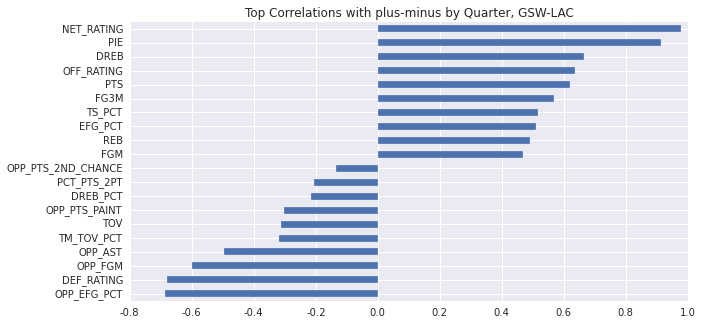

In [92]:
corrmat.sort('PLUS_MINUS')['PLUS_MINUS'][topcols].plot(kind='barh',figsize=(10,5))
plt.title("Top Correlations with plus-minus by Quarter, GSW-LAC")

## Basic Linear Regression

In [66]:
import statsmodels.api as sm

X = df[factor_columns]
y = df[target_columns]

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

In [73]:
a=est.summary()

In [82]:
coef=pd.DataFrame=a.tables[1]

In [99]:
j=a.tables[1].as_csv()

In [103]:
pd.DataFrame(j)

TypeError: 'SimpleTable' object is not callable

In [69]:
est.summary() # 16 Observations

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PLUS_MINUS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Sat, 31 Oct 2015   Prob (F-statistic):                nan
Time:                        17:45:00   Log-Likelihood:                 478.30
No. Observations:                  16   AIC:                            -924.6
Df Residuals:                       0   BIC:                            -912.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                  0.0071        inf          0        nan           nan       nan
AST_PCT                0.0246        inf          0        nan           nan       nan
BLK                   -0.0180        inf         -0        nan           nan       nan
DEF_RATING            -0.0485        inf         -0        nan           nan       nan
DREB                   0.0661        inf          0        nan           nan       nan
DREB_PCT               0.0043        inf          0        nan           nan       nan
EFG_PCT                0.0009        inf          0        nan           nan       nan
FG3A                   0.1589        inf          0        nan           nan       nan
FG3M                   0.4535        inf          0        nan           nan       nan
FG3_PCT                0.0738        inf          0        nan           nan       nan
FGA                    0.2586        inf          0        nan           nan       nan
FGM                   -0.0831        inf         -0        nan           nan       nan
FG_PCT                -0.0097        inf         -0        nan           nan       nan
FTA                    0.1562        inf          0        nan           nan       nan
NET_RATING             0.0447        inf          0        nan           nan       nan
NET_RATING             0.0447        inf          0        nan           nan       nan
OFF_RATING             0.0051        inf          0        nan           nan       nan
OPP_AST                0.2399        inf          0        nan           nan       nan
OPP_EFG_PCT            0.0033        inf          0        nan           nan       nan
OPP_FGA               -0.1314        inf         -0        nan           nan       nan
OPP_FGM               -0.2445        inf         -0        nan           nan       nan
OPP_PTS_2ND_CHANCE     0.0502        inf          0        nan           nan       nan
OPP_PTS_PAINT         -0.0227        inf         -0        nan           nan       nan
OPP_REB               -0.0248        inf         -0        nan           nan       nan
OPP_STL               -0.0743        inf         -0        nan           nan       nan
OREB                  -0.1294        inf         -0        nan           nan       nan
OREB_PCT              -0.0231        inf         -0        nan           nan       nan
PACE                  -0.0386        inf         -0        nan           nan       nan
PCT_PTS_2PT           -0.0694        inf         -0        nan           nan       nan
PCT_PTS_3PT            0.0477        inf          0        nan           nan       nan
PCT_PTS_FB             0.0036        inf          0        nan           nan       nan
PCT_PTS_FT             0.0286        inf          0        nan           nan       nan
PCT_PTS_OFF_TOV       -0.0195        i

# Reference

Team Stats used on NBA.com
![](https://hackpad-attachments.imgix.net/dsi_working.hackpad.com_8Rj1o12Tskt_p.450846_1446304513619_undefined?fit=max&w=882)